# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [31]:
# Import the titanic dataset here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")


In [32]:
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [33]:
# Code here
titanic_passengers = df_titanic[(df_titanic['class'].isin(['1st','2nd','3rd'])) & df_titanic['embarked'].notna()]
joint_distribution = pd.crosstab(titanic_passengers['class'], titanic_passengers['embarked'])
joint_distribution


embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [34]:
# Code here
given_embarked=pd.crosstab(titanic_passengers["class"], titanic_passengers["embarked"],normalize='columns')
given_embarked

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


In [35]:
given_class=pd.crosstab(titanic_passengers["class"], titanic_passengers["embarked"],normalize='index')
given_class

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


In [36]:
proportion_class3_southampton = given_class.loc['3rd', 'S']
print("Proportion of 3rd class passengers embarked at Southampton:", proportion_class3_southampton)

Proportion of 3rd class passengers embarked at Southampton: 0.6967559943582511


In [37]:
proportion_southampton_class3 = given_embarked.loc['3rd', 'S']
print("Proportion of Southampton passengers who were in 3rd class:", proportion_southampton_class3)

Proportion of Southampton passengers who were in 3rd class: 0.5404814004376368


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

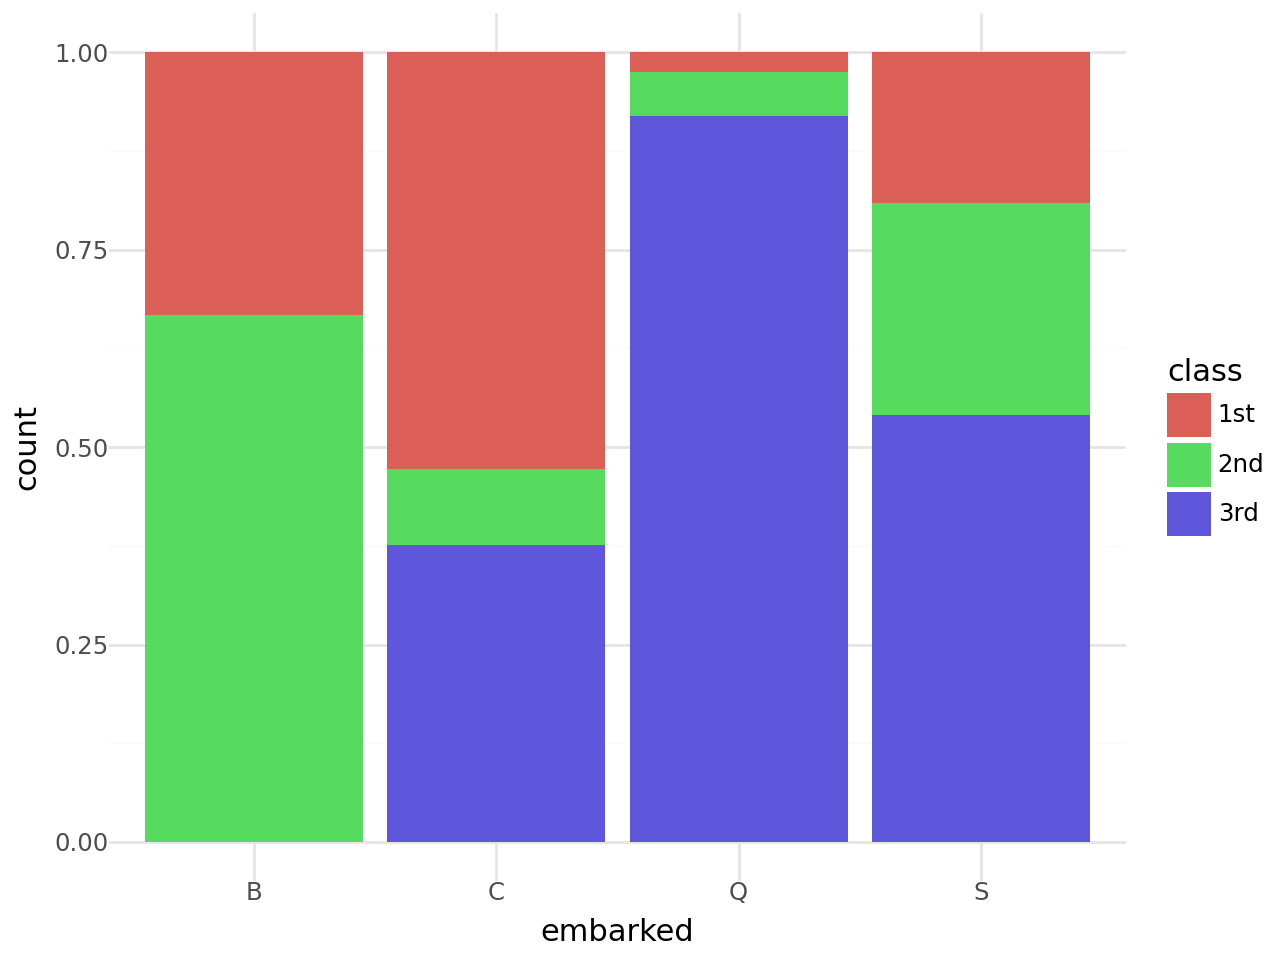

In [38]:
# Code here
from plotnine import geom_line, ggplot, aes, geom_boxplot, geom_point, geom_bar, geom_histogram, theme_minimal
from plotnine import facet_wrap


(ggplot(titanic_passengers, aes(x="embarked", fill="class"))
+ geom_bar(position="fill") +
 theme_minimal()
)

Pros and Cons of using this visualization versus the distributions you calculated before

Pros:
1. Visualization provides immediate way o see how  proportion of each class varies across embarkation locations. It also helps in comparing quantities at a glance
2. Visualizations are often more engaging and accessible to non-technical audiences compared to tables of numbers.

Cons:
1. The visualization isn't as precise as the calculated distributions as we need to rely on visual estimation.
2. If there were more categories of passengers or locations then the visualization could become cluttered or harder to read.

